# Future Selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F48C-6A56

 Directory of C:\Users\cm\Desktop\deployed-\30052021 Housing data Kaggle\8. Pipline\future selection

18-08-2021  21:15    <DIR>          .
18-08-2021  21:15    <DIR>          ..
18-08-2021  20:17    <DIR>          .ipynb_checkpoints
18-08-2021  21:15         2,298,080 20210818 FS-House_price_prediction_kaggle.ipynb
18-08-2021  01:48    <DIR>          results
18-08-2021  21:15         1,140,321 X_train.csv
18-08-2021  21:15            28,902 y_train.csv
               3 File(s)      3,467,303 bytes
               4 Dir(s)  109,085,503,488 bytes free


In [4]:
df = pd.read_csv("C:\\Users\\cm\Desktop\\deployed-\\30052021 Housing data Kaggle\\8. Pipline\\future engineering\\X_train.csv")

In [5]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,BsmtFinType2_Missing,Electrical_Missing,FireplaceQu_Missing,GarageType_Missing,GarageFinish_Missing,GarageQual_Missing,GarageCond_Missing,PoolQC_Missing,Fence_Missing,MiscFeature_Missing
0,1,12.247694,0.235294,1.0,0.418208,0.366344,1.0,1.0,1.000000,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,2,12.109011,0.000000,1.0,0.495064,0.391317,1.0,1.0,1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
2,3,12.317167,0.235294,1.0,0.434909,0.422359,1.0,1.0,0.518033,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,4,11.849398,0.294118,1.0,0.388581,0.390295,1.0,1.0,0.518033,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,5,12.429216,0.235294,1.0,0.513123,0.468761,1.0,1.0,0.518033,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [6]:
X_train = df.drop(["Id","SalePrice"], axis = 1)

In [7]:
y_train = df["SalePrice"]

In [8]:
X_train.shape, y_train.shape

((1460, 98), (1460,))

**Using Person Correlation for relation between independent variables**

<AxesSubplot:>

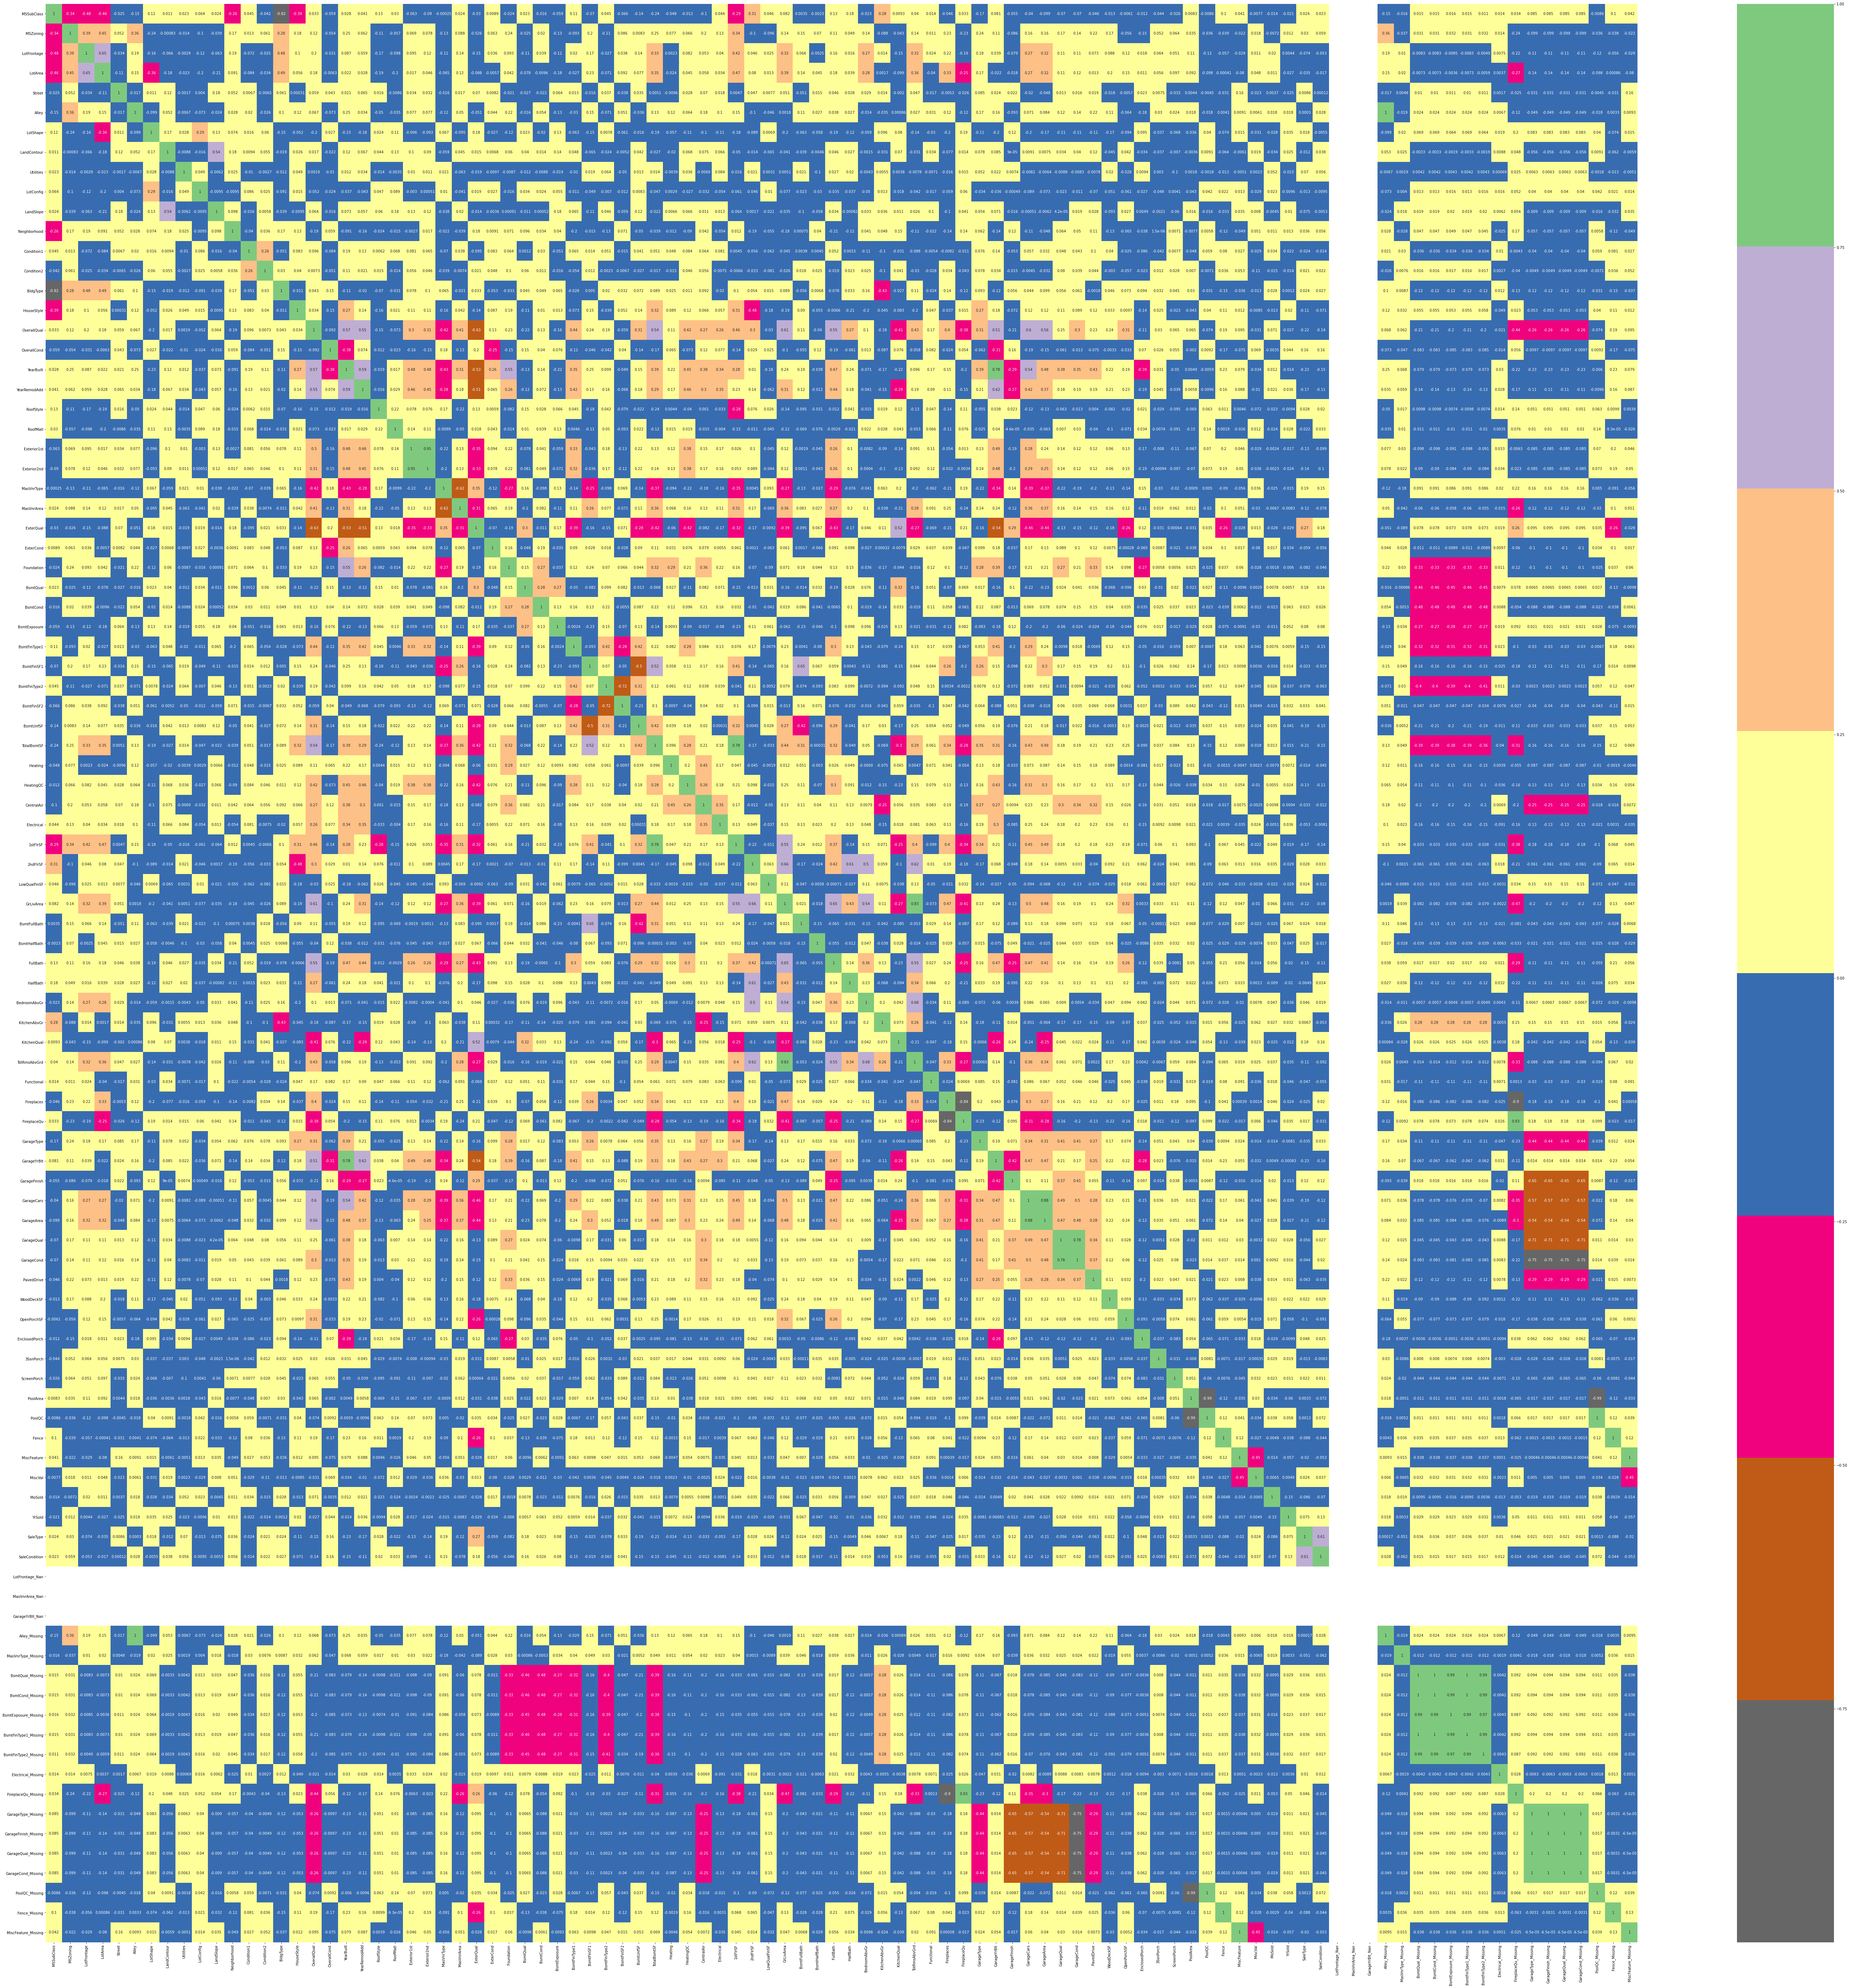

In [9]:
#trying to find correlation between independent variables
# Heat map for correlation
plt.figure(figsize = (100, 100))
cor = X_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Accent_r)

In [10]:
# Finding highly correlated values and removing for
def correlation(dataset, threshold):
  col_corr = set() # Set of all the names correlated columns
  corr_matrix = dataset.corr()

  for i in range(len(corr_matrix)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  
  return col_corr

In [11]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

23

In [12]:
corr_features

{'1stFlrSF',
 'Alley_Missing',
 'BldgType',
 'BsmtCond_Missing',
 'BsmtExposure_Missing',
 'BsmtFinSF2',
 'BsmtFinType1_Missing',
 'BsmtFinType2_Missing',
 'Exterior2nd',
 'Fence_Missing',
 'FireplaceQu',
 'FireplaceQu_Missing',
 'GarageArea',
 'GarageCond',
 'GarageCond_Missing',
 'GarageFinish_Missing',
 'GarageQual_Missing',
 'GarageType_Missing',
 'GarageYrBlt',
 'MiscFeature_Missing',
 'PoolQC',
 'PoolQC_Missing',
 'TotRmsAbvGrd'}

In [13]:
# droping columns 
X_train.drop(corr_features,axis = 1, inplace = True
            )

**selecting features based on information gain**

In [14]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([2.74329311e-01, 1.13038924e-01, 2.08119770e-01, 1.99300782e-01,
       0.00000000e+00, 1.65854304e-02, 9.55779088e-02, 2.58133745e-02,
       1.33017199e-02, 9.82631350e-03, 5.53045312e-03, 3.54951143e-01,
       7.23142415e-03, 4.20529749e-03, 7.90062398e-02, 5.63254886e-01,
       1.11025346e-01, 3.55839255e-01, 2.42546026e-01, 1.49276385e-02,
       6.79889107e-03, 1.30453208e-01, 8.62266158e-02, 8.40113259e-02,
       3.15031006e-01, 2.08180853e-02, 1.86952133e-01, 3.23070858e-01,
       2.99217747e-02, 7.63751137e-02, 1.52437771e-01, 1.41516635e-01,
       0.00000000e+00, 1.26267479e-01, 3.61890139e-01, 0.00000000e+00,
       1.60742338e-01, 6.78071056e-02, 5.04547903e-02, 1.99699456e-01,
       3.32563842e-03, 4.78141163e-01, 2.04518515e-02, 7.37237730e-03,
       2.64791308e-01, 8.30120774e-02, 7.44681065e-02, 2.10676721e-02,
       3.23544252e-01, 7.71335497e-03, 1.68354132e-01, 1.61865014e-01,
       2.68732992e-01, 3.69672612e-01, 5.97232815e-02, 4.56110232e-02,
      

In [15]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual     0.563255
GrLivArea       0.478141
GarageCars      0.369673
TotalBsmtSF     0.361890
YearBuilt       0.355839
                  ...   
YrSold          0.000000
BsmtFinType2    0.000000
Street          0.000000
3SsnPorch       0.000000
Heating         0.000000
Length: 75, dtype: float64

In [16]:
# Select top 20  percentile
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression,percentile= 20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x0000017C0BFBC940>)

In [17]:
selectd=  X_train.columns[selected_top_columns.get_support()]

In [18]:
X_train = X_train[selectd]

In [19]:
X_train.head()

,MSSubClass,LotFrontage,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,TotalBsmtSF,2ndFlrSF,GrLivArea,FullBath,KitchenQual,GarageFinish,GarageCars
0,0.235294,0.418208,0.663677,0.666667,0.949275,0.883333,0.53139,0.949511,0.140098,0.413559,0.577712,0.666667,0.78592,0.650763,0.50
1,0.000000,0.495064,0.040359,0.555556,0.753623,0.433333,1.00000,0.949511,0.206547,0.000000,0.470245,0.666667,1.00000,0.650763,0.50
2,0.235294,0.434909,0.663677,0.666667,0.934783,0.866667,0.53139,0.949511,0.150573,0.419370,0.593095,0.666667,0.78592,0.650763,0.50
3,0.294118,0.388581,0.219731,0.666667,0.311594,0.333333,1.00000,1.000000,0.123732,0.366102,0.579157,0.333333,0.78592,1.000000,0.75
4,0.235294,0.513123,0.174888,0.777778,0.927536,0.833333,0.53139,0.949511,0.187398,0.509927,0.666523,0.666667,0.78592,0.650763,0.75


In [21]:
X_train.to_csv("X_train.csv", index = False)

In [22]:
y_train.to_csv("y_train.csv", index = False)